In [314]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import mannwhitneyu
import re
import os
import seaborn as sns
from matplotlib import cm, colors

In [315]:
pd.set_option('display.max_columns', None) # Mostrar todas las columnas del DataFrame

In [316]:
NUMBER_VOICES = 20
PATH = os.getcwd()
TEST_FOLDER = 'test-result'
CASO_MATI = 'caso_mati.csv'
TEST_RESULT = 'Test_Subjetivo_Analisis_de_voces_artificiales_Submissions.csv'
GRAPH_FOLDER = 'sample-population'

## Caso arreglo mati

In [317]:
df_mati = pd.read_csv(os.path.join(PATH, TEST_FOLDER, CASO_MATI))

In [318]:
df_mati.columns = [x.strip() for x in df_mati.columns]

df_mati.rename(
    columns={
        "Cadencia": "Cadencia (16)",
        "Cadencia (16)": "Cadencia (17)",
        "Cadencia (17)": "Cadencia (18)",
        "Cadencia (18)": "Cadencia (19)",
        "Cadencia (19)": "Cadencia (20)",
        "¿Cuál es tu género?": "¿Cuál es tu género?\n",
        "¿Tienes experiencia previa utilizando tecnología de voz, como asistentes virtuales o sistemas de reconocimiento de voz?": "¿Tienes experiencia previa utilizando tecnología de voz, como asistentes virtuales o sistemas de reconocimiento de voz?\n"
    },
    inplace=True
)

In [319]:
df_mati

,Submission ID,Respondent ID,Submitted at,¿En cuál rango de edad te encuentras?,¿En qué lugar geográfico residís?,¿Cuál es tu género?\n,"¿Tienes experiencia previa utilizando tecnología de voz, como asistentes virtuales o sistemas de reconocimiento de voz?\n",Comprensión del mensaje (1),Pronunciación (1),Acentuación (1),Naturalidad (1),Cadencia (1),Comprensión del mensaje (2),Pronunciación (2),Acentuación (2),Naturalidad (2),Cadencia (2),Comprensión del mensaje (3),Pronunciación (3),Acentuación (3),Naturalidad (3),Cadencia (3),Comprensión del mensaje (4),Pronunciación (4),Acentuación (4),Naturalidad (4),Cadencia (4),Comprensión del mensaje (5),Pronunciación (5),Acentuación (5),Naturalidad (5),Cadencia (5),Comprensión del mensaje (6),Pronunciación (6),Acentuación (6),Naturalidad (6),Cadencia (6),Comprensión del mensaje (7),Pronunciación (7),Acentuación (7),Naturalidad (7),Cadencia (7),Comprensión del mensaje (8),Pronunciación (8),Acentuación (8),Naturalidad (8),Cadencia (8),Comprensión del mensaje (9),Pronunciación (9),Acentuación (9),Naturalidad (9),Cadencia (9),Comprensión del mensaje (10),Pronunciación (10),Acentuación (10),Naturalidad (10),Cadencia (10),Comprensión del mensaje (11),Pronunciación (11),Acentuación (11),Naturalidad (11),Cadencia (11),Comprensión del mensaje (12),Pronunciación (12),Acentuación (12),Naturalidad (12),Cadencia (12),Comprensión del mensaje (13),Pronunciación (13),Acentuación (13),Naturalidad (13),Cadencia (13),Comprensión del mensaje (14),Pronunciación (14),Acentuación (14),Naturalidad (14),Cadencia (14),Comprensión del mensaje (15),Pronunciación (15),Acentuación (15),Naturalidad (15),Cadencia (15),Comprensión del mensaje (16),Pronunciación (16),Acentuación (16),Naturalidad (16),Cadencia (16),Comprensión del mensaje (17),Pronunciación (17),Acentuación (17),Naturalidad (17),Cadencia (17),Comprensión del mensaje (18),Pronunciación (18),Acentuación (18),Naturalidad (18),Cadencia (18),Comprensión del mensaje (19),Pronunciación (19),Acentuación (19),Naturalidad (19),Cadencia (19),Comprensión del mensaje (20),Pronunciación (20),Acentuación (20),Naturalidad (20),Cadencia (20)
0,ZODWNy,AKvxEe,2023-05-31 22:37:39,Entre 25 y 29 años,Buenos Aires,Masculino,No,5,5,5,4,5,5,5,5,5,5,5,4,2,2,2,4,3,3,3,4,5,4,2,2,3,5,5,5,4,5,5,5,5,5,5,5,5,5,5,5,5,4,5,3,4,5,4,3,2,3,5,5,3,2,3,4,5,4,2,3,5,4,4,1,1,5,4,5,5,5,4,3,4,5,5,5,5,5,3,5,5,3,3,4,2,5,4,4,3,3,5,5,5,4,5,5,5,5,4,5


## Comienzo de datos

In [320]:
df = pd.read_csv(os.path.join(PATH, TEST_FOLDER, TEST_RESULT))

In [321]:
df.head()

,Submission ID,Respondent ID,Submitted at,¿En cuál rango de edad te encuentras?,¿En qué lugar geográfico residís?,¿Cuál es tu género?\n,"¿Tienes experiencia previa utilizando tecnología de voz, como asistentes virtuales o sistemas de reconocimiento de voz?\n",Comprensión del mensaje (1),Pronunciación (1),Acentuación (1),Naturalidad (1),Cadencia (1),Comprensión del mensaje (2),Pronunciación (2),Acentuación (2),Naturalidad (2),Cadencia (2),Comprensión del mensaje (3),Pronunciación (3),Acentuación (3),Naturalidad (3),Cadencia (3),Comprensión del mensaje (4),Pronunciación (4),Acentuación (4),Naturalidad (4),Cadencia (4),Comprensión del mensaje (5),Pronunciación (5),Acentuación (5),Naturalidad (5),Cadencia (5),Comprensión del mensaje (6),Pronunciación (6),Acentuación (6),Naturalidad (6),Cadencia (6),Comprensión del mensaje (7),Pronunciación (7),Acentuación (7),Naturalidad (7),Cadencia (7),Comprensión del mensaje (8),Pronunciación (8),Acentuación (8),Naturalidad (8),Cadencia (8),Comprensión del mensaje (9),Pronunciación (9),Acentuación (9),Naturalidad (9),Cadencia (9),Comprensión del mensaje (10),Pronunciación (10),Acentuación (10),Naturalidad (10),Cadencia (10),Comprensión del mensaje (11),Pronunciación (11),Acentuación (11),Naturalidad (11),Cadencia (11),Comprensión del mensaje (12),Pronunciación (12),Acentuación (12),Naturalidad (12),Cadencia (12),Comprensión del mensaje (13),Pronunciación (13),Acentuación (13),Naturalidad (13),Cadencia (13),Comprensión del mensaje (14),Pronunciación (14),Acentuación (14),Naturalidad (14),Cadencia (14),Comprensión del mensaje (15),Pronunciación (15),Acentuación (15),Naturalidad (15),Cadencia (15),Comprensión del mensaje (16),Pronunciación (16),Acentuación (16),Naturalidad (16),Cadencia (16),Comprensión del mensaje (17),Pronunciación (17),Acentuación (17),Naturalidad (17),Cadencia (17),Comprensión del mensaje (18),Pronunciación (18),Acentuación (18),Naturalidad (18),Cadencia (18),Comprensión del mensaje (19),Pronunciación (19),Acentuación (19),Naturalidad (19),Cadencia (19),Comprensión del mensaje (20),Pronunciación (20),Acentuación (20),Naturalidad (20),Cadencia (20)
0,14RxaO,jbQeoJ,2023-06-01 16:51:37,Entre 25 y 29 años,Buenos Aires,Masculino,No,5,2,5,2,4,4,3,5,3,2,5,3,2,2,2,5,2,5,2,5,5,2,5,1,2,5,5,3,4,5,5,5,4,3,5,5,4,5,1,2,5,5,4,2,2,5,5,5,1,1,5,5,5,4,4,5,5,4,3,2,5,5,2,1,1,5,5,4,4,5,5,4,1,3,4,5,4,2,3,5,5,5,5,2,5,5,5,5,3,5,5,5,5,5,5,5,5,5,5,5
1,rOYWbR,Ol5QxR,2023-06-01 17:06:01,Entre 25 y 29 años,Ciudad Autónoma de Buenos Aires,Masculino,Sí,4,4,4,3,5,5,5,5,4,5,4,3,2,1,1,4,3,2,2,2,4,4,3,2,1,5,5,5,4,5,4,4,4,3,3,4,3,3,1,3,5,5,5,5,5,4,3,1,1,1,5,5,4,4,5,4,4,3,2,2,5,5,5,3,1,5,5,5,3,4,5,5,5,3,3,5,5,5,5,5,5,4,5,1,3,4,4,4,1,3,5,5,5,4,5,5,5,5,5,5
2,vDzZRv,vryyJl,2023-06-01 20:22:14,Entre 25 y 29 años,Buenos Aires,Femenino,Sí,5,5,4,3,3,5,5,4,4,4,5,3,1,1,1,5,3,3,2,4,4,3,1,1,1,4,4,4,3,3,4,4,4,4,4,3,3,3,3,3,4,4,4,1,1,3,3,1,1,1,1,1,1,1,1,5,4,3,3,3,4,1,1,1,1,4,4,4,4,4,5,2,3,5,4,4,4,3,3,2,4,4,4,3,3,4,4,3,1,2,4,4,3,4,3,4,4,4,4,4
3,MaVopM,oDMBOb,2023-06-01 22:09:25,Entre 25 y 29 años,Buenos Aires,Femenino,Sí,5,5,5,3,3,5,3,3,3,3,5,5,3,3,3,5,5,5,5,5,5,3,3,3,3,5,5,5,5,5,5,5,5,3,3,5,3,3,3,3,5,5,5,3,3,5,5,3,3,3,5,5,3,3,3,5,5,5,4,4,5,5,5,2,1,5,5,5,5,1,5,3,4,4,4,5,5,5,5,1,5,5,5,5,1,5,5,5,3,1,5,5,5,5,1,5,5,5,5,1
4,El6jGq,Zo6JLy,2023-06-01 23:11:57,Entre 55 y 59 años,Buenos Aires,Masculino,No,5,5,5,5,5,5,5,5,5,5,5,5,5,1,2,5,5,5,4,5,5,5,5,2,2,5,5,5,4,5,5,5,5,5,5,5,5,5,3,2,5,5,5,4,4,5,5,4,3,2,5,5,5,2,3,5,5,5,4,3,5,5,5,1,2,5,5,5,5,5,5,5,5,3,3,5,5,5,4,5,5,5,5,3,4,5,5,5,3,2,5,5,5,5,5,5,5,5,3,3


In [322]:
df = pd.concat([df_mati, df], ignore_index=True)

In [323]:
df.rename(
    columns={
        'Submitted at': 'Marca temporal',
        '¿En cuál rango de edad te encuentras?': 'Rango_edad',
        '¿En qué lugar geográfico residís?': 'Lugar_geografico',
        '¿Cuál es tu género?\n': 'Genero',
        '¿Tienes experiencia previa utilizando tecnología de voz, como asistentes virtuales o sistemas de reconocimiento de voz?\n': 'Experiencia'
    },
    inplace=True)

## Sample Analysis

In [324]:
df_sample = df.loc[:, ['Lugar_geografico', 'Genero', 'Rango_edad', 'Experiencia']]

In [325]:
df_sample.head()

,Lugar_geografico,Genero,Rango_edad,Experiencia
0,Buenos Aires,Masculino,Entre 25 y 29 años,No
1,Buenos Aires,Masculino,Entre 25 y 29 años,No
2,Ciudad Autónoma de Buenos Aires,Masculino,Entre 25 y 29 años,Sí
3,Buenos Aires,Femenino,Entre 25 y 29 años,Sí
4,Buenos Aires,Femenino,Entre 25 y 29 años,Sí


### Rango de edad

In [326]:
data_age = df_sample.Rango_edad.value_counts()
data_age = pd.DataFrame(data_age)
data_age = data_age.reset_index().rename(columns={'count': 'Cantidad'})
data_age['Total'] = len(df_sample)
data_age['Relative_freq'] = np.round((data_age.Cantidad / data_age.Total)*100, 1)
data_age.sort_values(by=['Rango_edad'],inplace= True)
data_age

,Rango_edad,Cantidad,Total,Relative_freq
3,Entre 18 y 24 años,6,68,8.8
0,Entre 25 y 29 años,31,68,45.6
6,Entre 30 y 34 años,3,68,4.4
4,Entre 35 y 39 años,5,68,7.4
7,Entre 40 y 44 años,2,68,2.9
8,Entre 44 y 49 años,2,68,2.9
5,Entre 50 y 54 años,4,68,5.9
2,Entre 55 y 59 años,6,68,8.8
1,Entre 60 y 64 años,9,68,13.2


In [327]:
rango_edad_faltantes = {
    'Rango_edad': [
        'Menor a 18 años',
        '65 años o más'
    ],
    'Cantidad': np.zeros((2,)),
    'Total': [len(df_sample)] * 2,
    'Relative_freq': [0.0] * 2,
}

df_add = pd.DataFrame(rango_edad_faltantes)

In [328]:
data_age = pd.concat([data_age, df_add], ignore_index=True)
age_order = [
    'Menor a 18 años', 'Entre 18 y 24 años', 'Entre 25 y 29 años',
    'Entre 30 y 34 años', 'Entre 35 y 39 años', 'Entre 40 y 44 años',
    'Entre 44 y 49 años', 'Entre 50 y 54 años', 'Entre 55 y 59 años', 
    'Entre 60 y 64 años', '65 años o más'
]
data_age['Rango_edad'] = pd.Categorical(data_age['Rango_edad'], categories=age_order, ordered=True)
data_age = data_age.sort_values('Rango_edad')
data_age

,Rango_edad,Cantidad,Total,Relative_freq
9,Menor a 18 años,0.0,68,0.0
0,Entre 18 y 24 años,6.0,68,8.8
1,Entre 25 y 29 años,31.0,68,45.6
2,Entre 30 y 34 años,3.0,68,4.4
3,Entre 35 y 39 años,5.0,68,7.4
4,Entre 40 y 44 años,2.0,68,2.9
5,Entre 44 y 49 años,2.0,68,2.9
6,Entre 50 y 54 años,4.0,68,5.9
7,Entre 55 y 59 años,6.0,68,8.8
8,Entre 60 y 64 años,9.0,68,13.2


In [329]:
data_age.Relative_freq.sum()

99.9

In [330]:
# dims = (7.7, 4)
# fig,ax = plt.subplots(figsize=dims)
# with sns.axes_style('darkgrid'):
#     g = sns.barplot(x = 'Relative_freq', y = 'Rango_edad',data=data_age,ax=ax,saturation=0.9)
#     g.set_xlabel('',weight='bold',size='x-large',alpha=0.8,family= 'Arial',stretch='extra-expanded')
#     g.set_ylabel('',weight='bold',size='x-large',alpha=0.8,family= 'Arial',stretch='extra-expanded')
#     g.set_title('Porcentaje del rango de edad de la muestra estadística',weight='bold',size='xx-large',alpha=0.8,family= 'Arial',stretch='condensed')
#     g.set_xticks(list(range(0,110,10)))
#     g.grid(alpha=0.7)
#     # g.xaxis.grid(True, alpha=0.8)

#     # Agregar etiquetas con los valores de las barras horizontales
#     for p in g.patches:
#         width = p.get_width()
#         g.text(width + 0.5,
#                p.get_y() + p.get_height() / 2,
#                '{:1.2f}%'.format(width),
#                ha="left",
#                va="center")
    
#     plt.tight_layout()

#     plt.savefig(os.path.join(PATH, TEST_FOLDER, GRAPH_FOLDER, 'edad.png'))

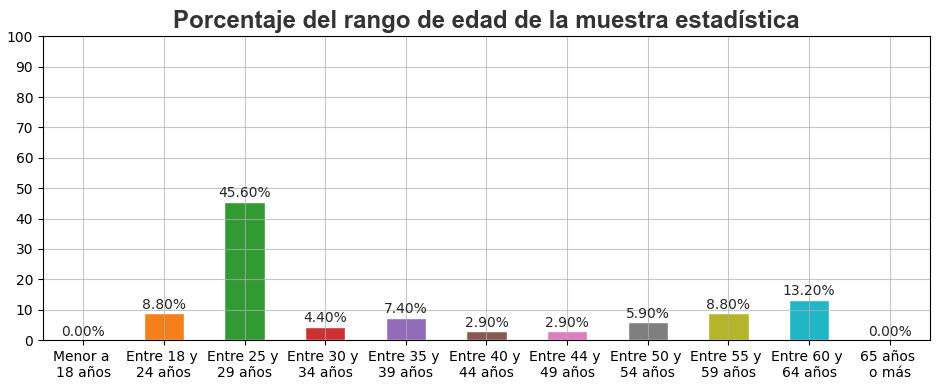

In [331]:
palette = sns.color_palette("tab10", len(data_age['Rango_edad'].unique()))

# Modificar los valores en el DataFrame
data_age['Rango_edad'] = data_age['Rango_edad'].replace({
    'Entre 18 y 24 años': 'Entre 18 y \n24 años',
    'Entre 25 y 29 años': 'Entre 25 y \n29 años',
    'Entre 30 y 34 años': 'Entre 30 y \n34 años',
    'Entre 35 y 39 años': 'Entre 35 y \n39 años',
    'Entre 40 y 44 años': 'Entre 40 y \n44 años',
    'Entre 44 y 49 años': 'Entre 44 y \n49 años',
    'Entre 50 y 54 años': 'Entre 50 y \n54 años',
    'Entre 55 y 59 años': 'Entre 55 y \n59 años',
    'Entre 60 y 64 años': 'Entre 60 y \n64 años',
    'Menor a 18 años': 'Menor a \n18 años',
    '65 años o más': '65 años \no más'
})

dims = (9.5, 4)
fig,ax = plt.subplots(figsize=dims)
with sns.axes_style('darkgrid'):
    g = sns.barplot(y = 'Relative_freq', x = 'Rango_edad',data=data_age,ax=ax,saturation=0.9, width=0.5, hue='Rango_edad', palette=palette)
    g.set_ylabel('',weight='bold',size='x-large',alpha=0.8,family= 'Arial',stretch='extra-expanded')
    g.set_xlabel('',weight='bold',size='x-large',alpha=0.8,family= 'Arial',stretch='extra-expanded')
    g.set_title('Porcentaje del rango de edad de la muestra estadística',weight='bold',size='xx-large',alpha=0.8,family= 'Arial',stretch='condensed')
    g.set_yticks(list(range(0,110,10)))
    g.grid(alpha=0.7)
    
    # Rotar las etiquetas del eje x
    # plt.xticks(rotation=30)

    # Agregar etiquetas con los valores de las barras verticales
    for p in g.patches:
        height = p.get_height()
        g.text(p.get_x() + p.get_width() / 2,
               height + 0.5,
               '{:1.2f}%'.format(height),
               ha="center",
               va="bottom")
    
    plt.tight_layout()

    plt.savefig(os.path.join(PATH, TEST_FOLDER, GRAPH_FOLDER, 'edad.png'))


### Género

In [332]:
data_gender = df_sample.Genero.value_counts()
data_gender = pd.DataFrame(data_gender)
data_gender = data_gender.reset_index().rename(columns={'count': 'Cantidad'})
data_gender['Total'] = len(df_sample)
data_gender['Relative_freq'] = np.round((data_gender.Cantidad / data_gender.Total)*100, 1)
data_gender.sort_values(by=['Genero'],inplace= True)
data_gender

,Genero,Cantidad,Total,Relative_freq
1,Femenino,15,68,22.1
0,Masculino,53,68,77.9


In [333]:
genero_faltantes = {
    'Genero': [
        'No binarie',
        'Prefiero no responder',
    ],
    'Cantidad': np.zeros((2,)),
    'Total': [len(df_sample)] * 2,
    'Relative_freq': [0.0] * 2,
}

df_add = pd.DataFrame(genero_faltantes)

In [334]:
data_gender = pd.concat([data_gender, df_add], ignore_index=True)
data_gender

,Genero,Cantidad,Total,Relative_freq
0,Femenino,15.0,68,22.1
1,Masculino,53.0,68,77.9
2,No binarie,0.0,68,0.0
3,Prefiero no responder,0.0,68,0.0


In [335]:
data_gender.Relative_freq.sum()

100.0

In [336]:
# dims = (7,4)
# fig,ax = plt.subplots(figsize=dims)
# with sns.axes_style('darkgrid'):
#     g = sns.barplot(x = 'Relative_freq', y = 'Genero',data=data_gender,ax=ax,saturation=0.9)
#     g.set_xlabel('',weight='bold',size='xx-large',alpha=0.8,family= 'Arial',stretch='extra-expanded')
#     g.set_ylabel('',weight='bold',size='x-large',alpha=0.8,family= 'Arial',stretch='extra-expanded')
#     g.set_title('Porcentaje del genero de la muestra estadística',weight='bold',size='xx-large',alpha=0.8,family= 'Arial',stretch='extra-expanded')
#     g.set_xticks(list(range(0,110,10)))
#     g.grid(alpha=0.7)
#     # g.xaxis.grid(True, alpha=0.8)

#     # Agregar etiquetas con los valores de las barras horizontales
#     for p in g.patches:
#         width = p.get_width()
#         g.text(width + 0.5,
#                p.get_y() + p.get_height() / 2,
#                '{:1.2f}%'.format(width),
#                ha="left",
#                va="center")
    
#     plt.tight_layout()

#     plt.savefig(os.path.join(PATH, TEST_FOLDER, GRAPH_FOLDER, 'genero.png'))

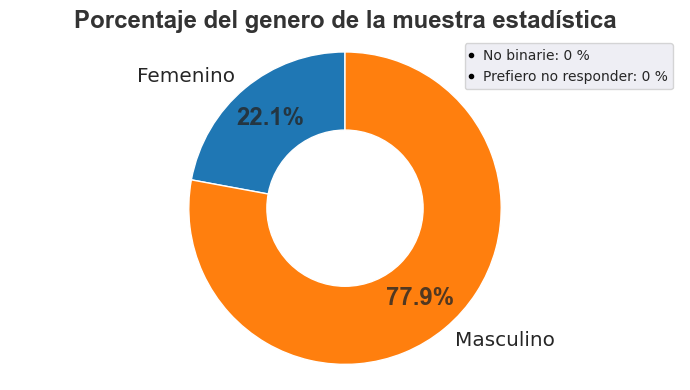

In [337]:
# data_gender.Genero =  data_gender.Genero.replace({
#     'Prefiero no responder': 'Prefiero no \nresponder'
# })


dims = (7,4)
fig,ax = plt.subplots(figsize=dims)
with sns.axes_style('darkgrid'):
    # Filtrar los datos para excluir los valores con 0%
    data_gender_filtered = data_gender[data_gender['Relative_freq'] > 0]

    # Crear el gráfico de dona
    wedges, texts, autotexts = ax.pie(data_gender_filtered['Relative_freq'], labels=data_gender_filtered['Genero'], autopct='%1.1f%%', startangle=90, pctdistance=0.75)

    # Dibujar un círculo blanco en el centro para hacerlo un gráfico de dona
    centre_circle = plt.Circle((0,0),0.50,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    # Igualar la relación de aspecto para asegurar que la dona se dibuje como un círculo
    ax.axis('equal')

    # Configurar las etiquetas de porcentaje para que sean más legibles
    plt.setp(autotexts, size='xx-large', weight='bold', alpha=0.8, family='Arial', stretch='extra-expanded')
    
    plt.setp(texts, size='x-large')

    # Configurar el título del gráfico
    ax.set_title('Porcentaje del genero de la muestra estadística', weight='bold', size='xx-large', alpha=0.8, family='Arial', stretch='extra-expanded')

    # Crear una leyenda para los valores con 0%
    zero_percent_labels = data_gender[data_gender['Relative_freq'] == 0]['Genero']
    legend = ax.legend([plt.Line2D((0,0),(0,0), color='black', marker='o', markersize=3)] * len(zero_percent_labels), zero_percent_labels + ': 0 %', handlelength=0.1)

    plt.tight_layout()

    plt.savefig(os.path.join(PATH, TEST_FOLDER, GRAPH_FOLDER, 'genero.png'))


### Lugar Geográfico

In [338]:
data_zone = df_sample.Lugar_geografico.value_counts()
data_zone = pd.DataFrame(data_zone)
data_zone = data_zone.reset_index().rename(columns={'count': 'Cantidad'})
data_zone['Total'] = len(df_sample)
data_zone['Relative_freq'] = np.round((data_zone.Cantidad / data_zone.Total)*100, 1)
data_zone.sort_values(by=['Relative_freq'],inplace= True, ascending=False) #Lugar_geografico
data_zone

,Lugar_geografico,Cantidad,Total,Relative_freq
0,Buenos Aires,42,68,61.8
1,Ciudad Autónoma de Buenos Aires,16,68,23.5
2,Córdoba,4,68,5.9
3,San Juan,2,68,2.9
4,Mendoza,1,68,1.5
5,Santa Fe,1,68,1.5
6,La Pampa,1,68,1.5
7,Río Negro,1,68,1.5


In [339]:
# dims = (9.5,4)
# fig,ax = plt.subplots(figsize=dims)
# with sns.axes_style('darkgrid'):
#     g = sns.barplot(x = 'Relative_freq', y = 'Lugar_geografico', data=data_zone,ax=ax,saturation=0.9)
#     g.set_xlabel('',weight='bold',size='xx-large',alpha=0.8,family= 'Arial',stretch='extra-expanded')
#     g.set_ylabel('',weight='bold',size='x-large',alpha=0.8,family= 'Arial',stretch='extra-expanded')
#     g.set_title('Porcentaje del lugar geográfico de la muestra estadística',weight='bold',size='xx-large',alpha=0.8,family= 'Arial',stretch='extra-expanded')
#     g.set_xticks(list(range(0,110,10)))
#     g.grid(alpha=0.7)
#     # g.xaxis.grid(True, alpha=0.8)

#     # Agregar etiquetas con los valores de las barras horizontales
#     for p in g.patches:
#         width = p.get_width()
#         g.text(width + 0.5,
#                p.get_y() + p.get_height() / 2,
#                '{:1.2f}%'.format(width),
#                ha="left",
#                va="center")

#     plt.tight_layout()

#     plt.savefig(os.path.join(PATH, TEST_FOLDER, GRAPH_FOLDER, 'lugar_geografico.png'))

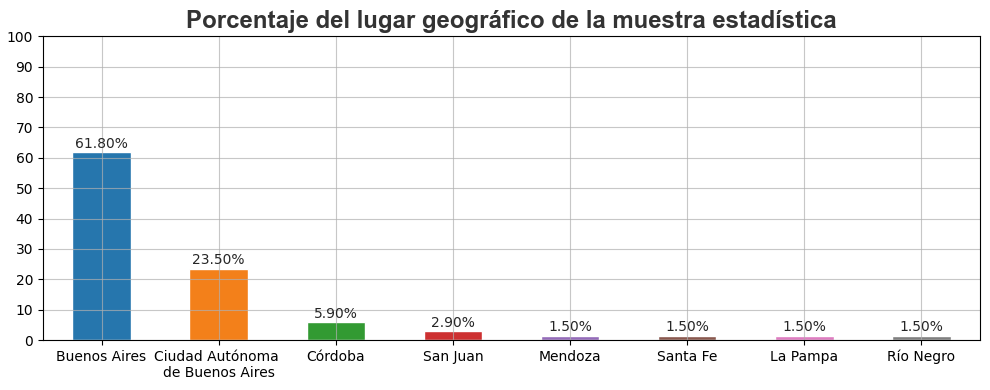

In [340]:
palette = sns.color_palette("tab10", len(data_zone['Lugar_geografico'].unique()))

data_zone['Lugar_geografico'] = data_zone['Lugar_geografico'].replace({
    'Ciudad Autónoma de Buenos Aires': 'Ciudad Autónoma \nde Buenos Aires'
})

dims = (10,4)
fig,ax = plt.subplots(figsize=dims)
with sns.axes_style('darkgrid'):
    g = sns.barplot(y = 'Relative_freq', x = 'Lugar_geografico', data=data_zone,ax=ax,saturation=0.9, width=0.5, palette=palette, hue='Lugar_geografico')
    g.set_ylabel('',weight='bold',size='xx-large',alpha=0.8,family= 'Arial',stretch='extra-expanded')
    g.set_xlabel('',weight='bold',size='x-large',alpha=0.8,family= 'Arial',stretch='extra-expanded')
    g.set_title('Porcentaje del lugar geográfico de la muestra estadística',weight='bold',size='xx-large',alpha=0.8,family= 'Arial',stretch='extra-expanded')
    g.set_yticks(list(range(0,110,10)))
    g.grid(alpha=0.7)

    # Agregar etiquetas con los valores de las barras verticales
    for p in g.patches:
        height = p.get_height()
        g.text(p.get_x() + p.get_width() / 2,
               height + 0.5,
               '{:1.2f}%'.format(height),
               ha="center",
               va="bottom")
    
    plt.tight_layout()

    plt.savefig(os.path.join(PATH, TEST_FOLDER, GRAPH_FOLDER, 'lugar_geografico.png'))


### Experiencia en Uso de Tecnologías TTS

In [341]:
data_exp = df_sample.Experiencia.value_counts()
data_exp = pd.DataFrame(data_exp)
data_exp = data_exp.reset_index().rename(columns={'count': 'Cantidad'})
data_exp['Total'] = len(df_sample)
data_exp['Relative_freq'] = np.round((data_exp.Cantidad / data_exp.Total)*100, 1)
data_exp.sort_values(by=['Experiencia'],inplace= True)
data_exp

,Experiencia,Cantidad,Total,Relative_freq
0,No,35,68,51.5
2,No estoy seguro,8,68,11.8
1,Sí,25,68,36.8


In [342]:
exp_faltantes = {
    'Experiencia': ['Prefiero no responder'],
    'Cantidad': [0.0],
    'Total': [len(df_sample)],
    'Relative_freq': [0.0],
}

df_add = pd.DataFrame(exp_faltantes)

In [343]:
data_exp = pd.concat([data_exp, df_add], ignore_index=True)
data_exp

,Experiencia,Cantidad,Total,Relative_freq
0,No,35.0,68,51.5
1,No estoy seguro,8.0,68,11.8
2,Sí,25.0,68,36.8
3,Prefiero no responder,0.0,68,0.0


In [344]:
data_exp.Relative_freq.sum()

100.1

In [345]:
# dims = (6.9,4)
# fig,ax = plt.subplots(figsize=dims)
# with sns.axes_style('darkgrid'):
#     g = sns.barplot(x = 'Relative_freq', y = 'Experiencia',data=data_exp,ax=ax,saturation=0.9)
#     g.set_xlabel('',weight='bold',size='xx-large',alpha=0.8,family= 'Arial',stretch='extra-expanded')
#     g.set_ylabel('',weight='bold',size='x-large',alpha=0.8,family= 'Arial',stretch='extra-expanded')
#     g.set_title('Porcentaje de encuestados con experiencia en \n tecnologías TTS de la muestra estadística',weight='bold',size='xx-large',alpha=0.8,family= 'Arial',stretch='extra-expanded')
#     g.set_xticks(list(range(0,110,10)))
#     g.grid(alpha=0.7)
#     # g.xaxis.grid(True, alpha=0.8)

#     # Agregar etiquetas con los valores de las barras horizontales
#     for p in g.patches:
#         width = p.get_width()
#         g.text(width + 0.5,
#                p.get_y() + p.get_height() / 2,
#                '{:1.2f}%'.format(width),
#                ha="left",
#                va="center")
    
#     plt.tight_layout()

#     plt.savefig(os.path.join(PATH, TEST_FOLDER, GRAPH_FOLDER, 'experiencia_TTS.png'))

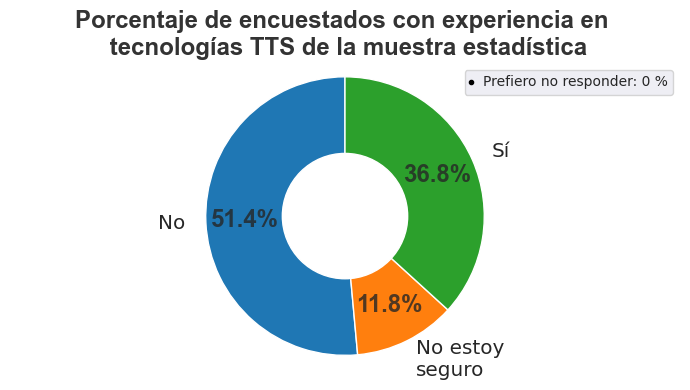

In [346]:
data_exp['Experiencia'] = data_exp['Experiencia'].replace({
    'No estoy seguro': 'No estoy \nseguro'
})


dims = (7,4)
fig,ax = plt.subplots(figsize=dims)
with sns.axes_style('darkgrid'):
    # Filtrar los datos para excluir los valores con 0%
    data_exp_filtered = data_exp[data_exp['Relative_freq'] > 0]

    # Crear el gráfico de dona
    wedges, texts, autotexts = ax.pie(data_exp_filtered['Relative_freq'], labels=data_exp_filtered['Experiencia'], autopct='%1.1f%%', startangle=90, pctdistance=0.72, labeldistance=1.15)
    
    # Dibujar un círculo blanco en el centro para hacerlo un gráfico de dona
    centre_circle = plt.Circle((0,0),0.45,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    # Igualar la relación de aspecto para asegurar que la dona se dibuje como un círculo
    ax.axis('equal')

    # Configurar las etiquetas de porcentaje para que sean más legibles
    plt.setp(autotexts, size='xx-large', weight='bold', alpha=0.8, family='Arial', stretch='extra-expanded')
    
    plt.setp(texts, size='x-large')

    # Configurar el título del gráfico
    ax.set_title('Porcentaje de encuestados con experiencia en \n tecnologías TTS de la muestra estadística', weight='bold', size='xx-large', alpha=0.8, family='Arial', stretch='extra-expanded')

    # Crear una leyenda para los valores con 0%
    zero_percent_labels = data_exp[data_exp['Relative_freq'] == 0]['Experiencia']
    legend = ax.legend([plt.Line2D((0,0),(0,0), color='black', marker='o', markersize=3)] * len(zero_percent_labels), zero_percent_labels + ': 0 %', handlelength=0.1)

    plt.tight_layout()

    plt.savefig(os.path.join(PATH, TEST_FOLDER, GRAPH_FOLDER, 'experiencia_TTS.png'))


## Preprocessing

In [347]:
df.head()

,Submission ID,Respondent ID,Marca temporal,Rango_edad,Lugar_geografico,Genero,Experiencia,Comprensión del mensaje (1),Pronunciación (1),Acentuación (1),Naturalidad (1),Cadencia (1),Comprensión del mensaje (2),Pronunciación (2),Acentuación (2),Naturalidad (2),Cadencia (2),Comprensión del mensaje (3),Pronunciación (3),Acentuación (3),Naturalidad (3),Cadencia (3),Comprensión del mensaje (4),Pronunciación (4),Acentuación (4),Naturalidad (4),Cadencia (4),Comprensión del mensaje (5),Pronunciación (5),Acentuación (5),Naturalidad (5),Cadencia (5),Comprensión del mensaje (6),Pronunciación (6),Acentuación (6),Naturalidad (6),Cadencia (6),Comprensión del mensaje (7),Pronunciación (7),Acentuación (7),Naturalidad (7),Cadencia (7),Comprensión del mensaje (8),Pronunciación (8),Acentuación (8),Naturalidad (8),Cadencia (8),Comprensión del mensaje (9),Pronunciación (9),Acentuación (9),Naturalidad (9),Cadencia (9),Comprensión del mensaje (10),Pronunciación (10),Acentuación (10),Naturalidad (10),Cadencia (10),Comprensión del mensaje (11),Pronunciación (11),Acentuación (11),Naturalidad (11),Cadencia (11),Comprensión del mensaje (12),Pronunciación (12),Acentuación (12),Naturalidad (12),Cadencia (12),Comprensión del mensaje (13),Pronunciación (13),Acentuación (13),Naturalidad (13),Cadencia (13),Comprensión del mensaje (14),Pronunciación (14),Acentuación (14),Naturalidad (14),Cadencia (14),Comprensión del mensaje (15),Pronunciación (15),Acentuación (15),Naturalidad (15),Cadencia (15),Comprensión del mensaje (16),Pronunciación (16),Acentuación (16),Naturalidad (16),Cadencia (16),Comprensión del mensaje (17),Pronunciación (17),Acentuación (17),Naturalidad (17),Cadencia (17),Comprensión del mensaje (18),Pronunciación (18),Acentuación (18),Naturalidad (18),Cadencia (18),Comprensión del mensaje (19),Pronunciación (19),Acentuación (19),Naturalidad (19),Cadencia (19),Comprensión del mensaje (20),Pronunciación (20),Acentuación (20),Naturalidad (20),Cadencia (20)
0,ZODWNy,AKvxEe,2023-05-31 22:37:39,Entre 25 y 29 años,Buenos Aires,Masculino,No,5,5,5,4,5,5,5,5,5,5,5,4,2,2,2,4,3,3,3,4,5,4,2,2,3,5,5,5,4,5,5,5,5,5,5,5,5,5,5,5,5,4,5,3,4,5,4,3,2,3,5,5,3,2,3,4,5,4,2,3,5,4,4,1,1,5,4,5,5,5,4,3,4,5,5,5,5,5,3,5,5,3,3,4,2,5,4,4,3,3,5,5,5,4,5,5,5,5,4,5
1,14RxaO,jbQeoJ,2023-06-01 16:51:37,Entre 25 y 29 años,Buenos Aires,Masculino,No,5,2,5,2,4,4,3,5,3,2,5,3,2,2,2,5,2,5,2,5,5,2,5,1,2,5,5,3,4,5,5,5,4,3,5,5,4,5,1,2,5,5,4,2,2,5,5,5,1,1,5,5,5,4,4,5,5,4,3,2,5,5,2,1,1,5,5,4,4,5,5,4,1,3,4,5,4,2,3,5,5,5,5,2,5,5,5,5,3,5,5,5,5,5,5,5,5,5,5,5
2,rOYWbR,Ol5QxR,2023-06-01 17:06:01,Entre 25 y 29 años,Ciudad Autónoma de Buenos Aires,Masculino,Sí,4,4,4,3,5,5,5,5,4,5,4,3,2,1,1,4,3,2,2,2,4,4,3,2,1,5,5,5,4,5,4,4,4,3,3,4,3,3,1,3,5,5,5,5,5,4,3,1,1,1,5,5,4,4,5,4,4,3,2,2,5,5,5,3,1,5,5,5,3,4,5,5,5,3,3,5,5,5,5,5,5,4,5,1,3,4,4,4,1,3,5,5,5,4,5,5,5,5,5,5
3,vDzZRv,vryyJl,2023-06-01 20:22:14,Entre 25 y 29 años,Buenos Aires,Femenino,Sí,5,5,4,3,3,5,5,4,4,4,5,3,1,1,1,5,3,3,2,4,4,3,1,1,1,4,4,4,3,3,4,4,4,4,4,3,3,3,3,3,4,4,4,1,1,3,3,1,1,1,1,1,1,1,1,5,4,3,3,3,4,1,1,1,1,4,4,4,4,4,5,2,3,5,4,4,4,3,3,2,4,4,4,3,3,4,4,3,1,2,4,4,3,4,3,4,4,4,4,4
4,MaVopM,oDMBOb,2023-06-01 22:09:25,Entre 25 y 29 años,Buenos Aires,Femenino,Sí,5,5,5,3,3,5,3,3,3,3,5,5,3,3,3,5,5,5,5,5,5,3,3,3,3,5,5,5,5,5,5,5,5,3,3,5,3,3,3,3,5,5,5,3,3,5,5,3,3,3,5,5,3,3,3,5,5,5,4,4,5,5,5,2,1,5,5,5,5,1,5,3,4,4,4,5,5,5,5,1,5,5,5,5,1,5,5,5,3,1,5,5,5,5,1,5,5,5,5,1


In [348]:
# Crear una lista vacía para almacenar los DataFrames resultantes
dfs = []

# Iterar sobre las filas del DataFrame original
for i, row in df.iterrows():
    
    # Crear un nuevo DataFrame con una sola fila
    df_row = pd.DataFrame(row).T
    
    # Aplicar la función melt al DataFrame para transformarlo en el formato deseado
    df_melted = pd.melt(df_row,
                        id_vars=['Marca temporal'],
                        value_vars=[f'Comprensión del mensaje ({i})' for i in range(1, NUMBER_VOICES + 1)] +
                                   [f'Acentuación ({i})' for i in range(1, NUMBER_VOICES + 1)] +
                                   [f'Pronunciación ({i})' for i in range(1, NUMBER_VOICES + 1)] +
                                   [f'Cadencia ({i})' for i in range(1, NUMBER_VOICES + 1)] +
                                   [f'Naturalidad ({i})' for i in range(1, NUMBER_VOICES + 1)],
                        var_name='Variable',
                        value_name='Valor')
    
    # Agregar una columna con el número de voz
    df_melted['Voz'] = (df_melted.index % NUMBER_VOICES) + 1
    
    # Reemplazar los valores de la columna 'Variable' por los nombres deseados
    df_melted['Variable'] = df_melted['Variable'].replace({f'Comprensión del mensaje ({i})': 'Inteligibilidad' for i in range(1, NUMBER_VOICES + 1)})
    df_melted['Variable'] = df_melted['Variable'].replace({f'Acentuación ({i})': 'Acentuacion' for i in range(1, NUMBER_VOICES + 1)})
    df_melted['Variable'] = df_melted['Variable'].replace({f'Pronunciación ({i})': 'Pronunciacion' for i in range(1, NUMBER_VOICES + 1)})
    df_melted['Variable'] = df_melted['Variable'].replace({f'Cadencia ({i})': 'Cadencia' for i in range(1, NUMBER_VOICES + 1)})
    df_melted['Variable'] = df_melted['Variable'].replace({f'Naturalidad ({i})': 'Naturalidad' for i in range(1, NUMBER_VOICES + 1)})
    
    # Pivotear el DataFrame para obtener el formato final
    df_pivoted = df_melted.pivot(index='Voz', columns='Variable', values='Valor').reset_index()
    
    # Agregar la columna 'Marca temporal'
    df_pivoted['Marca temporal'] = row['Marca temporal']
    
    # Reordenar las columnas
    df_pivoted = df_pivoted[['Marca temporal', 'Inteligibilidad', 'Pronunciacion',  'Acentuacion', 'Naturalidad', 'Cadencia']]
    
    # Agregar el DataFrame a la lista
    dfs.append(df_pivoted)
    
# Concatenar los DataFrames de la lista para obtener el DataFrame final
df_final = pd.concat(dfs).reset_index(drop=True)


In [349]:
df[df['Marca temporal'] == '2023-06-01 20:22:14']

,Submission ID,Respondent ID,Marca temporal,Rango_edad,Lugar_geografico,Genero,Experiencia,Comprensión del mensaje (1),Pronunciación (1),Acentuación (1),Naturalidad (1),Cadencia (1),Comprensión del mensaje (2),Pronunciación (2),Acentuación (2),Naturalidad (2),Cadencia (2),Comprensión del mensaje (3),Pronunciación (3),Acentuación (3),Naturalidad (3),Cadencia (3),Comprensión del mensaje (4),Pronunciación (4),Acentuación (4),Naturalidad (4),Cadencia (4),Comprensión del mensaje (5),Pronunciación (5),Acentuación (5),Naturalidad (5),Cadencia (5),Comprensión del mensaje (6),Pronunciación (6),Acentuación (6),Naturalidad (6),Cadencia (6),Comprensión del mensaje (7),Pronunciación (7),Acentuación (7),Naturalidad (7),Cadencia (7),Comprensión del mensaje (8),Pronunciación (8),Acentuación (8),Naturalidad (8),Cadencia (8),Comprensión del mensaje (9),Pronunciación (9),Acentuación (9),Naturalidad (9),Cadencia (9),Comprensión del mensaje (10),Pronunciación (10),Acentuación (10),Naturalidad (10),Cadencia (10),Comprensión del mensaje (11),Pronunciación (11),Acentuación (11),Naturalidad (11),Cadencia (11),Comprensión del mensaje (12),Pronunciación (12),Acentuación (12),Naturalidad (12),Cadencia (12),Comprensión del mensaje (13),Pronunciación (13),Acentuación (13),Naturalidad (13),Cadencia (13),Comprensión del mensaje (14),Pronunciación (14),Acentuación (14),Naturalidad (14),Cadencia (14),Comprensión del mensaje (15),Pronunciación (15),Acentuación (15),Naturalidad (15),Cadencia (15),Comprensión del mensaje (16),Pronunciación (16),Acentuación (16),Naturalidad (16),Cadencia (16),Comprensión del mensaje (17),Pronunciación (17),Acentuación (17),Naturalidad (17),Cadencia (17),Comprensión del mensaje (18),Pronunciación (18),Acentuación (18),Naturalidad (18),Cadencia (18),Comprensión del mensaje (19),Pronunciación (19),Acentuación (19),Naturalidad (19),Cadencia (19),Comprensión del mensaje (20),Pronunciación (20),Acentuación (20),Naturalidad (20),Cadencia (20)
3,vDzZRv,vryyJl,2023-06-01 20:22:14,Entre 25 y 29 años,Buenos Aires,Femenino,Sí,5,5,4,3,3,5,5,4,4,4,5,3,1,1,1,5,3,3,2,4,4,3,1,1,1,4,4,4,3,3,4,4,4,4,4,3,3,3,3,3,4,4,4,1,1,3,3,1,1,1,1,1,1,1,1,5,4,3,3,3,4,1,1,1,1,4,4,4,4,4,5,2,3,5,4,4,4,3,3,2,4,4,4,3,3,4,4,3,1,2,4,4,3,4,3,4,4,4,4,4


In [350]:
df_final[df_final['Marca temporal'] == '2023-06-01 20:22:14']

# df_final['Marca temporal'].unique()

Variable,Marca temporal,Inteligibilidad,Pronunciacion,Acentuacion,Naturalidad,Cadencia
60,2023-06-01 20:22:14,5,5,4,3,3
61,2023-06-01 20:22:14,5,5,4,4,4
62,2023-06-01 20:22:14,5,3,1,1,1
63,2023-06-01 20:22:14,5,3,3,2,4
64,2023-06-01 20:22:14,4,3,1,1,1
65,2023-06-01 20:22:14,4,4,4,3,3
66,2023-06-01 20:22:14,4,4,4,4,4
67,2023-06-01 20:22:14,3,3,3,3,3
68,2023-06-01 20:22:14,4,4,4,1,1
69,2023-06-01 20:22:14,3,3,1,1,1


In [351]:
df_final = df_final.drop('Marca temporal', axis=1)
df_final = df_final.astype(int)

In [352]:
# Generar la columna "ID" con el patrón deseado
num_repetitions = 20
num_rows = len(df_final)
id_values = np.tile(np.arange(1, num_repetitions + 1), (num_rows // num_repetitions) + 1)[:num_rows]
df_final['ID'] = id_values

In [353]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1360 entries, 0 to 1359
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Inteligibilidad  1360 non-null   int32
 1   Pronunciacion    1360 non-null   int32
 2   Acentuacion      1360 non-null   int32
 3   Naturalidad      1360 non-null   int32
 4   Cadencia         1360 non-null   int32
 5   ID               1360 non-null   int32
dtypes: int32(6)
memory usage: 32.0 KB


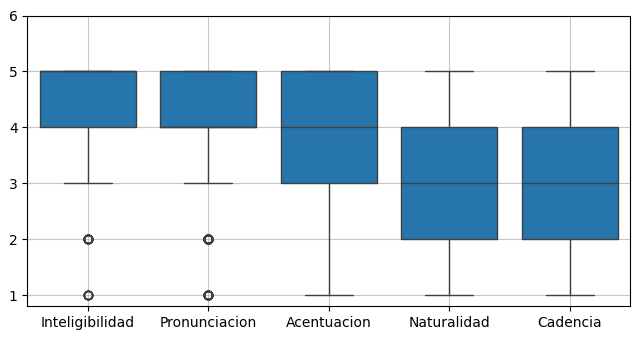

In [354]:
# Transformar el DataFrame para tener una columna con las categorías y otra con los valores
df_melted = df_final.melt(id_vars='ID', value_vars=['Inteligibilidad', 'Pronunciacion', 'Acentuacion', 'Naturalidad', 'Cadencia'], var_name='Variable', value_name='Valor')

dims = (6.5,3.5)
fig,ax = plt.subplots(figsize=dims)
with sns.axes_style('darkgrid'):
    # Crear un gráfico de caja para las columnas especificadas
    sns.boxplot(x='Variable', y='Valor', data=df_melted,ax=ax,saturation=0.9)
    
    # Personalizar el formato del gráfico
    ax.set_xlabel('',weight='bold',size='xx-large',alpha=0.8,family= 'Arial',stretch='extra-expanded')
    ax.set_ylabel('',weight='bold',size='x-large',alpha=0.8,family= 'Arial',stretch='extra-expanded')
    ax.set_yticks(list(range(1,7)))
    # ax.set_title('Porcentaje del genero de la muestra estadística',weight='bold',size='xx-large',alpha=0.8,family= 'Arial',stretch='extra-expanded')
    ax.grid(alpha=0.7)
    
    plt.tight_layout()

    plt.savefig(os.path.join(PATH, TEST_FOLDER, GRAPH_FOLDER, 'distribucion_muestra_estadistica.png'))

# Mostrar el gráfico
plt.show()

In [355]:
df_final.to_csv(r'aux_file\data_to_mannwhitney.csv', index=False)